<a href="https://colab.research.google.com/github/JGrant3101/ME4MachineLearning/blob/main/Tutorial4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Start by importing any libraries that we might need
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn import model_selection
from sklearn import naive_bayes
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
import pandas
import plotly.graph_objects as go
import sys


Question 1

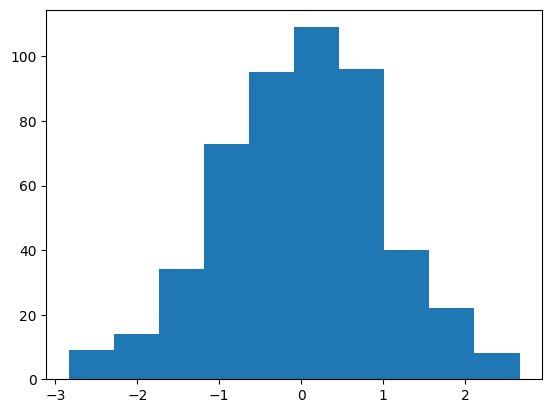

In [ ]:
# Start by importing the dataset and creating arrays of temperature and strength
data = pandas.read_csv("http://pogo.software/me4ml/tensile_strength.csv")
t = np.array(data['Temperature (deg C)'][:])
s = np.array(data['Ultimate tensile strength (Pa)'][:])
# Calculate the mean and standard deviation of both the temperature and strength
t_mean = np.mean(t)
t_std = np.std(t)
s_mean = np.mean(s)
s_std = np.std(s)

# Scaling the data, this centres both signals around 0 and gives them similar magnitudes
t_scale = (t - t_mean) / t_std
s_scale = (s - s_mean) / s_std

# Plotting a histogram of the scaled data
fig, ax = plt.subplots()
plt.hist(s_scale)
plt.show()

Above we have plotted a histogram of the scalled strength data.

In [ ]:
# Saving the scaling parameters for temperature and strength
scArray = np.array([[t_mean, s_mean], [t_std, s_std]])
np.savetxt('scaleParams.txt', scArray)

# Downloading the file from the colab interface
from google.colab import files
files.download('scaleParams.txt')

# Loading in the parameters
loadedScales = np.loadtxt('scaleParams.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Question 2

(0.0, 1.0)

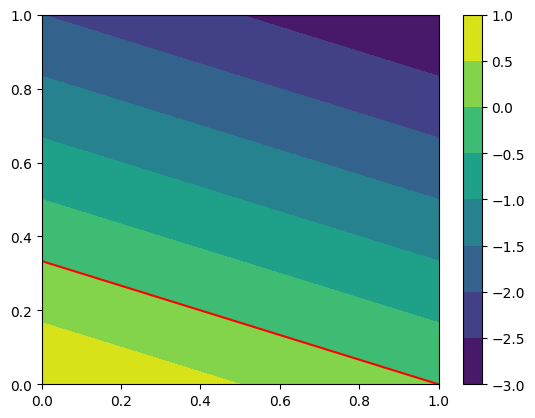

In [ ]:
# Plotting a linear discrimination function
# Creating an x1 and x2 array
x1 = np.linspace(0, 1, 101)
x2 = np.linspace(0, 1, 101)
x1grid, x2grid = np.meshgrid(x1, x2)
Xgrid = np.array([x1grid, x2grid]).reshape([2, 101*101]).T

# Creating the weight vector and the threshold weight
w = np.array([[-1], [-3]])
w0 = 1

# Defining the discrimination function
g = np.matmul(w.T, Xgrid.T).T + w0
g = np.reshape(g, [101, 101])

# Line which corresponds to the discrmination line, g(x) = 0
yDiscr = (-x1 + 1) / 3

# Plotting
fig, ax = plt.subplots()
plt.contourf(x1, x2, g)
plt.plot(x1, yDiscr, color = 'r')
plt.colorbar()
plt.xlim(0, 1)
plt.ylim(0, 1)

Above we have generated a contour plot for the discriminant function defined in the question as well as defining the g = 0 line.

Question 3

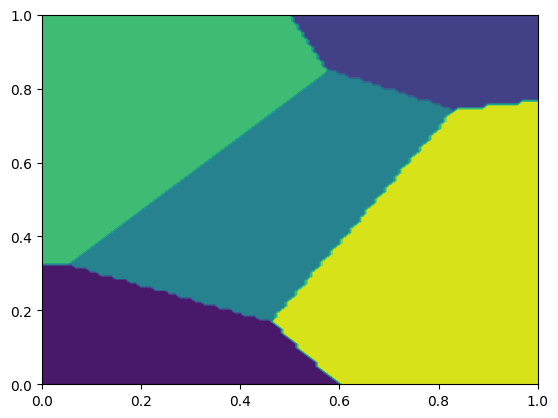

In [ ]:
# Plotting classification areas
# Defining our different weight vectors
a1 = np.array([[1.3], [-1], [-3]])
a2 = np.array([[-2], [1], [2]])
a3 = np.array([[0.3], [0.1], [-0.1]])
a4 = np.array([[0], [-1], [1]])
a5 = np.array([[-0.2], [1.5], [-1]])

# Can use the same Xgrid as before as once again we want x1 and x2 varying from 0 to 1
# Ygrid is defined as the same as Xgrid, except it has 1 at the beginning - this therefore adds a column of ones to the left
Ygrid = np.concatenate([np.ones([101 * 101, 1]), Xgrid], axis = 1)

#Calculate each of the five functions of g as defined, g = ay where a is the weight vector and y is the matrix of 1's, x1 values and x2 values
g1 = np.matmul(Ygrid, a1)
g2 = np.matmul(Ygrid, a2)
g3 = np.matmul(Ygrid, a3)
g4 = np.matmul(Ygrid, a4)
g5 = np.matmul(Ygrid, a5)

# Combine all 5 functions together
gconc = np.concatenate([g1, g2, g3, g4, g5], axis = 1)

# Find which of the values is largest for each row, this corresponds to which i has the largest gi(x) which is what we ant
omega = np.argmax(gconc, axis = 1)

# Put back onto 2D grid so it can easily be plott
omega = np.reshape(omega, [101, 101])

#Plotting
fig, ax = plt.subplots()
plt.contourf(x1, x2, omega)

Above we have generated a 2D map of classification based on 5 different linear discriminant function.

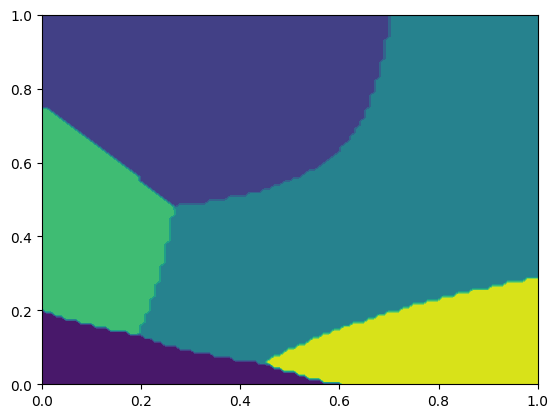

In [ ]:
#Adding an x1x2 term
a1 = np.array([[1.3], [-1], [-3], [-10]])
a2 = np.array([[-1], [1.5], [3], [-1]])
a3 = np.array([[0.4], [-0.1], [-0.1], [3]])
a4 = np.array([[0.5], [-1], [1], [-0.1]])
a5 = np.array([[-0.2], [1.5], [-1], [0.4]])

# Adding the x1x2 terms to the Ygrid array
x1x2 = np.multiply(x1grid, x2grid)
x1x2 = np.reshape(x1x2, [101 * 101, 1])

YgridNL = np.concatenate([Ygrid, x1x2], axis = 1)

#Calculate each of the five functions of g as defined, g = ay where a is the weight vector and y is the matrix of 1's, x1 values and x2 values
g1NL = np.matmul(YgridNL, a1)
g2NL = np.matmul(YgridNL, a2)
g3NL = np.matmul(YgridNL, a3)
g4NL = np.matmul(YgridNL, a4)
g5NL = np.matmul(YgridNL, a5)

# Combine all 5 functions together
gNLconc = np.concatenate([g1NL, g2NL, g3NL, g4NL, g5NL], axis = 1)

# Find which of the values is largest for each row, this corresponds to which i has the largest gi(x) which is what we ant
omegaNL = np.argmax(gNLconc, axis = 1)

# Put back onto 2D grid so it can easily be plott
omegaNL = np.reshape(omegaNL, [101, 101])

#Plotting
fig, ax = plt.subplots()
plt.contourf(x1, x2, omegaNL)

Above we have generated a 2D map of classification based on 5 different non linear determination functions